# Setup - DO NOT RUN
- This is for pulling data from GitHub (which we don't need to do anymore)


In [ ]:
# install IBL pipeline package to access and navigate the pipeline
!pip install --quiet nma-ibl
# Download data needed for plot recreation
!wget https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy

     |████████████████████████████████| 101 kB 4.2 MB/s 
     |████████████████████████████████| 4.1 MB 55.4 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
--2022-07-25 13:40:16--  https://github.com/vathes/nma-ibl/raw/master/uuids_trained1.npy
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy [following]
--2022-07-25 13:40:16--  https://github.com/datajoint-company/nma-ibl/raw/master/uuids_trained1.npy
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/datajoint-company/nma-ibl/master/uuids_trained1.npy [following]
--2022-07-25 13:40:17--  https://raw.githubu

In [ ]:
import datajoint as dj

dj.config['database.host'] = 'datajoint-public.internationalbrainlab.org'
dj.config['database.user'] = 'ibl-public'
dj.config['database.password'] = 'ibl-public'
dj.conn() # explicitly verify that the connection to database can be established

[2022-07-25 13:40:17,991][INFO]: Connecting ibl-public@datajoint-public.internationalbrainlab.org:3306
[2022-07-25 13:40:18,353][INFO]: Connected ibl-public@datajoint-public.internationalbrainlab.org:3306


DataJoint connection (connected) ibl-public@datajoint-public.internationalbrainlab.org:3306

In [ ]:
from nma_ibl.paper_behavior_functions import (query_subjects, seaborn_style,
                                              group_colors, institution_map, seaborn_style)

In [ ]:
from nma_ibl import behavior, subject, behavior_analyses  # this is all we are using for now
#from nma_ibl import reference, subject, action, acquisition, data, behavior, behavior_analyses
#ephys = dj.create_virtual_module('ephys', 'ibl_ephys')
#behavior = dj.create_virtual_module('behavior', 'ibl_behavior')

Some functions of interest, in datajoint:

dj.Diagram(\<shema\>)

dj.describe(\<shema\>)

Our data table will be only of trained mice (but with all training trials over all days)

In [ ]:
uuids = np.load('uuids_trained1.npy', allow_pickle=True)
subjects = subject.Subject & [{'subject_uuid': uuid} for uuid in uuids]
use_subjects = query_subjects()
behavior_analyses.BehavioralSummaryByDate()
b = behavior_analyses.BehavioralSummaryByDate * use_subjects
trained_mouse_trials = behavior.TrialSet.Trial * use_subjects

# Build our Data Table OLD DO NOT RUN

Our data table will be only of trained mice (but with all training trials over all days)

The lab we will be using will be the "churchlandlab", or Lab 3

In [ ]:
#cshl_trials_all_dj

In [ ]:
#cshl_trials_all_dj & 'trial_included != "None"'

In [ ]:
#cshl_trials_all_dj & 'trial_iti_duration > 0'

In [ ]:
cshl007_trials = cshl_trials_all_dj & 'subject_nickname = "CSHL_007"'
#cshl007_trials  # these are the trials once the mouse has reached the 'trained' threshold

In [ ]:
col_names = ["lab_name", "trial_id", "subject_nickname", 
                                "trial_start_time", "trial_end_time", "trial_stim_on_time", 
                                "trial_response_time", "trial_feedback_type", 
                                "trial_stim_contrast_left", 
                                "trial_stim_contrast_right", "trial_included"]

df_cshl007 = pd.DataFrame(cshl007_trials.fetch("lab_name", "trial_id", "subject_nickname", 
                                "trial_start_time", "trial_end_time", "trial_stim_on_time", 
                                "trial_response_time", "trial_feedback_type", 
                                "trial_stim_contrast_left", 
                                "trial_stim_contrast_right","trial_included")).T
df_cshl007.columns = col_names

#df_cshl007

# Normalize the column
df_cshl007_normalized = df_cshl007.copy()

def normalize(col) :
  return (col - col.min())/ (col.max() - col.min())

columns_to_normalize = [ "response_duration", "trial_start_time", "trial_end_time", "trial_stim_on_time", 
                                "trial_response_time", "trial_feedback_type",
                                "trial_stim_contrast_left", 
                                "trial_stim_contrast_right"]
for col in columns_to_normalize:
  df_cshl007_normalized[col] = normalize(df_cshl007_normalized[col])

# Practice with one mouse (old version) DO NOT RUN


In [ ]:
behavior.TrialSet.Trial.describe()

In [ ]:
# Split the data into two lists of response times
irt = []  # responses after incorrect
crt = []  # responses after correct
res_time = 0.0

for i in range(1, len(df_cshl007_normalized)):
  if (df_cshl007_normalized.trial_feedback_type[i-1] == 0):
    res_time = df_cshl007_normalized.response_duration[i]
    if (pd.isna(res_time) == False):
      irt.append(res_time)
  
  else:
    res_time = df_cshl007_normalized.response_duration[i]
    if (pd.isna(res_time) == False):
      crt.append(res_time)
    

In [ ]:
all_response_durations = df_cshl007_normalized['response_duration']
x = np.array(all_response_durations)
x = x.astype("float")
x

array([0.08654819, 0.35171359, 0.07557201, ..., 0.03114096, 0.03110317,
       0.03118992])

In [ ]:
np.isnan(x)

array([False, False, False, ..., False, False, False])

In [ ]:
x[0]

False

In [ ]:
for i in range(len(x)):
  if x[i]:
    print("found it at index value " + str(i))
    

found it at index value 1921
found it at index value 1922
found it at index value 5620
found it at index value 5621
found it at index value 5622
found it at index value 5623
found it at index value 5624
found it at index value 5625
found it at index value 5626
found it at index value 8178
found it at index value 10376
found it at index value 12952
found it at index value 12953
found it at index value 12954
found it at index value 12955
found it at index value 12956
found it at index value 14599
found it at index value 14600
found it at index value 15088
found it at index value 15090
found it at index value 15091
found it at index value 15092
found it at index value 15093
found it at index value 15094
found it at index value 15095
found it at index value 17102
found it at index value 19999
found it at index value 20000
found it at index value 20001
found it at index value 20002
found it at index value 20003
found it at index value 27120
found it at index value 27121
found it at index va

In [ ]:
#crt

In [ ]:
#irt

In [ ]:
# conduct t-test on chunks of equal length from both the lists; for eg 5000 samples from both
# then repeat it for different chunks from both for n times

# average the obtained values
import scipy.stats as stats
from random import sample
from matplotlib import pyplot as plt

p_values = [] # array that we will populate with the p-values from our t test

#print(stats.ttest_rel(sample(irt,2000), sample(crt, 2000))[1])
#for i in range(500):
  #p_values.append(stats.ttest_rel(sample(irt,2000), sample(crt, 2000))[1])

# print(p_values[0])
#print(np.mean(p_values))

#plt.hist(sample(irt, 2000), bins = 200)
#plt.hist(sample(crt, 2000), bins = 200)
#plt.show()

#stats.ttest_rel(sample(irt,2000), sample(crt, 2000))[1]

5.975876702061701e-34
6710 21798


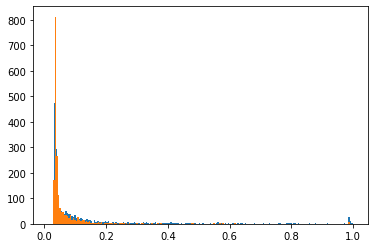

In [ ]:
import scipy.stats as stats
from random import sample
from matplotlib import pyplot as plt

p_values = []

for i in range(500):
  p_values.append(stats.ttest_rel(sample(irt, k=2000), sample(crt, k=2000))[1])

#print(sample(irt, k=10))
#print(irt)
#print(p_values)
print(np.mean(p_values))
print(len(irt), len(crt))

plt.hist(sample(irt, 2000), bins = 200)
plt.hist(sample(crt, 2000), bins = 200)
plt.show()


In [ ]:
crt_new = crt[:200]
irt_new = irt[:200]
x = stats.ttest_rel(crt_new, irt_new)[1]
x

9.911736053077698e-05

In [ ]:
len(irt)

6710

Shuffle the correct incorrect 

In [ ]:
df_cshl007_normalized

,lab_name,trial_id,subject_nickname,response_duration,trial_start_time,trial_end_time,trial_stim_on_time,trial_response_time,trial_feedback_type,trial_stim_contrast_left,trial_stim_contrast_right
0,churchlandlab,1,CSHL_007,0.086548,0.0,0.000826,0.000125,0.000664,0.0,0.0,0.5
1,churchlandlab,2,CSHL_007,0.351714,0.001167,0.00478,0.001279,0.004659,0.0,0.0,0.5
2,churchlandlab,3,CSHL_007,0.075572,0.005179,0.007996,0.007659,0.00808,1.0,0.5,0.0
3,churchlandlab,4,CSHL_007,0.167207,0.008508,0.01,0.00853,0.009934,0.0,1.0,0.0
4,churchlandlab,5,CSHL_007,0.404019,0.010437,0.014439,0.010478,0.01442,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31743,churchlandlab,278,CSHL_007,0.031112,0.956294,0.956779,0.95628,0.956277,0.0,0.0,0.0
31744,churchlandlab,279,CSHL_007,0.031144,0.967219,0.967559,0.967316,0.967314,0.0,1.0,0.0
31745,churchlandlab,280,CSHL_007,0.031141,0.978108,0.978368,0.978096,0.978095,0.0,0.0,0.125
31746,churchlandlab,281,CSHL_007,0.031103,0.989072,0.989223,0.989062,0.98906,0.0,1.0,0.0


In [ ]:
# We want to bin our data (i.e. place it into 3 bins)
df_cshl007_for_GLM = df_cshl007_normalized.copy() # make a copy just in case
# create three bins (slow,med,fast) and replace the response times with these labels
df_cshl007_for_GLM['response_duration'] = pd.qcut(df_cshl007_for_GLM['response_duration'], q=3, labels=["fast", "medium", "slow"])
df_cshl007_for_GLM

,lab_name,trial_id,subject_nickname,response_duration,trial_start_time,trial_end_time,trial_stim_on_time,trial_response_time,trial_feedback_type,trial_stim_contrast_left,trial_stim_contrast_right
0,churchlandlab,1,CSHL_007,slow,0.0,0.000826,0.000125,0.000664,0.0,0.0,0.5
1,churchlandlab,2,CSHL_007,slow,0.001167,0.00478,0.001279,0.004659,0.0,0.0,0.5
2,churchlandlab,3,CSHL_007,slow,0.005179,0.007996,0.007659,0.00808,1.0,0.5,0.0
3,churchlandlab,4,CSHL_007,slow,0.008508,0.01,0.00853,0.009934,0.0,1.0,0.0
4,churchlandlab,5,CSHL_007,slow,0.010437,0.014439,0.010478,0.01442,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
31743,churchlandlab,278,CSHL_007,fast,0.956294,0.956779,0.95628,0.956277,0.0,0.0,0.0
31744,churchlandlab,279,CSHL_007,fast,0.967219,0.967559,0.967316,0.967314,0.0,1.0,0.0
31745,churchlandlab,280,CSHL_007,fast,0.978108,0.978368,0.978096,0.978095,0.0,0.0,0.125
31746,churchlandlab,281,CSHL_007,fast,0.989072,0.989223,0.989062,0.98906,0.0,1.0,0.0


# PCA


In [ ]:
# @title PCA functions
def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors


def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian

  Note that samples are sorted in ascending order for the first random
  variable.

  Args:
    var_1 (scalar)                     : variance of the first random variable
    var_2 (scalar)                     : variance of the second random variable
    cov_matrix (numpy array of floats) : desired covariance matrix

  Returns:
    (numpy array of floats)            : samples from the bivariate Gaussian,
                                          with each column corresponding to a
                                          different random variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]
  return X


def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and
  correlation coefficient.

  Args:
    var_1 (scalar)         :  variance of the first random variable
    var_2 (scalar)         :  variance of the second random variable
    corr_coef (scalar)     :  correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """
  cov = corr_coef * np.sqrt(var_1 * var_2)
  cov_matrix = np.array([[var_1, cov], [cov, var_2]])
  return cov_matrix


def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2D vector used for new basis

  Returns:
    (numpy array of floats)   : new orthonormal basis columns correspond to
                                basis vectors
  """

  u = u / np.sqrt(u[0] ** 2 + u[1] ** 2)
  w = np.array([-u[1], u[0]])
  W = np.column_stack((u, w))
  return W


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)
  return Y

def get_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
  """
  # Subtract the mean of X
  X = X - np.mean(X,0) # why is it axis=0 so that you do it by column

  # Calculate the covariance matrix (hint: use np.matmul)
  cov_matrix = ( 1/ X.shape[0] ) * np.matmul(X.T, X)

  cov_matrix = cov_matrix = cov_matrix.astype('float64')

  return cov_matrix

def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.

  Args:
    X (numpy array of floats): Data matrix each column corresponds to a
                               different random variable

  Returns:
    (numpy array of floats)  : Data projected onto the new basis
    (numpy array of floats)  : Vector of eigenvalues
    (numpy array of floats)  : Corresponding matrix of eigenvectors

  """
  # Calculate the sample covariance matrix
  cov_matrix = get_cov_matrix(X) # same as above

  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(cov_matrix) # get the eigenvectors/vals of the cov matrix

  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals, evectors)

  # Project the data onto the new eigenvector basis
  score = change_of_basis(X, evectors)

  return score, evectors, evals

def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.ylabel('Projection \n basis vector 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()

  # @title Plotting Functions

def plot_eigenvalues(evals):
  """
  Plots eigenvalues.

  Args:
      (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """
  plt.figure(figsize=(4, 4))
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  plt.xticks(np.arange(1, len(evals) + 1))
  plt.ylim([0, 2.5])


def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  scatter plot of their joint activity. The title indicates the sample
  correlation calculated from the data.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number (sorted)')
  plt.ylabel('Neuron 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.ylabel('Projection \n basis vector 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable
    W (numpy array of floats) : Square matrix representing new orthonormal
                                basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()

In [ ]:
# make a copy of our normalized data frame
df_cshl007_for_PCA = df_cshl007_normalized.copy()

# shift response durations up, so that each response duration is in the same row as the variables that caused it
# it is going up, because response time relies on the previous trial's parameters
df_cshl007_for_PCA['response_duration'] = df_cshl007_for_PCA['response_duration'].shift(-1)  
df_cshl007_for_PCA = df_cshl007_for_PCA.drop(31747) # delete the last row

# remove useless columns
cols = [3,8,9,10]
df_cshl007_for_PCA = df_cshl007_for_PCA[df_cshl007_for_PCA.columns[cols]]
df_cshl007_for_PCA

,response_duration,trial_feedback_type,trial_stim_contrast_left,trial_stim_contrast_right
0,0.351714,0.0,0.0,0.5
1,0.075572,0.0,0.0,0.5
2,0.167207,1.0,0.5,0.0
3,0.404019,0.0,1.0,0.0
4,0.030904,0.0,1.0,0.0
...,...,...,...,...
31742,0.031112,0.0,0.0625,0.0
31743,0.031144,0.0,0.0,0.0
31744,0.031141,0.0,1.0,0.0
31745,0.031103,0.0,0.0,0.125


In [ ]:
# Step 1: define X as the matrix of parameters of interest
X = df_cshl007_for_PCA.iloc[:, 1:4].values  # the three rightmost columns are the parameters of interest

# Step 2: Run PCA with our data table X
score, evectors, evals = pca(X)

print(score)
print(" ")
print(evectors)
print(" ")
print(evals)

[[-0.13165440161194278 0.31669131041274556 0.363832011298153]
 [-0.13165440161194278 0.31669131041274556 0.363832011298153]
 [-0.9350939015284124 -0.5878455868574514 0.1733117461010384]
 ...
 [0.055983825279432825 -0.7429779798957261 0.6669704136595174]
 [-0.032913600402985695 0.07917282760318639 0.09095800282453825]
 [0.055983825279432825 -0.7429779798957261 0.6669704136595174]]
 
[[-0.96308581 -0.2163566  -0.16017346]
 [ 0.05598383 -0.74297798  0.66697041]
 [-0.2633088   0.63338262  0.72766402]]
 
[0.18717215 0.13426923 0.0699842 ]


# Setup RUN THIS

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install pingouin
import pingouin as pg

import scipy.stats as stats
#from matplotlib import pyplot as plt

from statsmodels.formula.api import ols, glm

from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the csv file chunk-wise to select the lab
# Source: https://datascientyst.com/read_csv-skip-rows-condition-values-pandas/

# 12s with 100k, 8sec with 50k
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
lab_data = pd.concat((x.query("lab_name == 'churchlandlab'") for x in csv_pointer), ignore_index=True)

array(['cortexlab', 'mrsicflogellab', 'wittenlab', 'mainenlab',
       'zadorlab', 'churchlandlab', 'danlab', 'angelakilab', 'hoferlab'],
      dtype=object)

# GLM

We will exclude mainen lab, because they wanted to be unique

In [ ]:
lab_data

,subject_nickname,session_start_time,trial_id,normalized_response_duration,normalized_stimulus_delay,session_phase,stimulus_contrast,stimulus_location,trial_feedback_type,lab_name
0,CSHL_007,2019-03-04 15:27:54,1,-0.035438,-0.023742,1,0.5000,2,1,churchlandlab
1,CSHL_007,2019-03-04 15:27:54,2,1.729818,-0.068886,1,0.5000,2,-1,churchlandlab
2,CSHL_007,2019-03-04 15:27:54,3,-0.108509,7.588126,1,0.5000,1,-1,churchlandlab
3,CSHL_007,2019-03-04 15:27:54,4,0.501521,-0.357286,1,1.0000,1,1,churchlandlab
4,CSHL_007,2019-03-04 15:27:54,5,2.078027,-0.299805,1,1.0000,1,-1,churchlandlab
...,...,...,...,...,...,...,...,...,...,...
569290,CSHL_012,2019-11-22 09:22:13,206,0.343446,-0.076625,3,0.0625,2,1,churchlandlab
569291,CSHL_012,2019-11-22 09:22:13,207,8.901195,-0.080181,3,0.2500,1,-1,churchlandlab
569292,CSHL_012,2019-11-22 09:22:13,208,1.391399,-0.090695,3,0.0000,2,-1,churchlandlab
569293,CSHL_012,2019-11-22 09:22:13,209,2.703603,0.075997,3,0.1250,2,1,churchlandlab


In [ ]:
variables_of_interest = ['normalized_stimulus_delay', 'session_phase', 
                         'stimulus_contrast', 'stimulus_location', 'trial_feedback_type']
                        
lm = pg.linear_regression(lab_data[variables_of_interest], lab_data['normalized_response_duration'])
lm

formula = 'S ~ C(E) + C(M) + X'

lm = ols(formula, salary_table).fit()

print(lm.summary())

formula = 'normalized_response_duration ~ normalized_stimulus_delay \
+ C(session_phase) + stimulus_contrast + stimulus_location + trial_feedback_type \
+ C(session_phase):C(trial_feedback_type)' # normal_resp_dur ~ variables we want to relate it to 

In [ ]:
# Train Test Split
y = lab_data[['normalized_response_duration']]
X = lab_data[['normalized_stimulus_delay', 'session_phase', 'stimulus_contrast', 'stimulus_location', 'trial_feedback_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

X_train['normalized_response_duration'] = y_train['normalized_response_duration']

train_data = X_train

# Train GLM with Training Data --> No Intersection
formula = 'normalized_response_duration ~ normalized_stimulus_delay \
+ C(session_phase) + stimulus_contrast + stimulus_location + trial_feedback_type' # normal_resp_dur ~ variables we want to relate it to 

glm1 = glm(formula, train_data).fit()
print(glm1.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     normalized_response_duration   No. Observations:               381427
Model:                                      GLM   Df Residuals:                   381420
Model Family:                          Gaussian   Df Model:                            6
Link Function:                         identity   Scale:                         0.97937
Method:                                    IRLS   Log-Likelihood:            -5.3724e+05
Date:                          Thu, 28 Jul 2022   Deviance:                   3.7355e+05
Time:                                  13:49:02   Pearson chi2:                 3.74e+05
No. Iterations:                               3   Pseudo R-squ. (CS):            0.03446
Covariance Type:                      nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------

In [ ]:
glm1.pseudo_rsquared()

0.0344600723819225

In [ ]:
glm1.params # how to get parameters from the model

Intercept                   -0.052931
C(session_phase)[T.2]        0.036398
C(session_phase)[T.3]        0.331378
normalized_stimulus_delay    0.039276
stimulus_contrast           -0.028530
stimulus_location            0.000844
trial_feedback_type         -0.123627
dtype: float64

In [ ]:
formula = 'normalized_response_duration ~ trial_feedback_type' # normal_resp_dur ~ variables we want to relate it to 

glm2 = glm(formula, train_data).fit()
print(glm2.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     normalized_response_duration   No. Observations:               381427
Model:                                      GLM   Df Residuals:                   381425
Model Family:                          Gaussian   Df Model:                            1
Link Function:                         identity   Scale:                          1.0022
Method:                                    IRLS   Log-Likelihood:            -5.4164e+05
Date:                          Thu, 28 Jul 2022   Deviance:                   3.8226e+05
Time:                                  13:49:46   Pearson chi2:                 3.82e+05
No. Iterations:                               3   Pseudo R-squ. (CS):            0.01142
Covariance Type:                      nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------

In [ ]:
formula = 'normalized_response_duration ~ normalized_stimulus_delay \
+ C(session_phase) + stimulus_contrast + stimulus_location' # normal_resp_dur ~ variables we want to relate it to 

glm3 = glm(formula, train_data).fit()
print(glm3.summary())

                      Generalized Linear Model Regression Results                       
Dep. Variable:     normalized_response_duration   No. Observations:               381427
Model:                                      GLM   Df Residuals:                   381421
Model Family:                          Gaussian   Df Model:                            5
Link Function:                         identity   Scale:                         0.99116
Method:                                    IRLS   Log-Likelihood:            -5.3952e+05
Date:                          Thu, 28 Jul 2022   Deviance:                   3.7805e+05
Time:                                  13:51:30   Pearson chi2:                 3.78e+05
No. Iterations:                               3   Pseudo R-squ. (CS):            0.02250
Covariance Type:                      nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
----------------

":" will give a regression without the level itself. It indicates just the interaction you have mentioned.

"*" will give a regression with the level itself + the interaction you have mentioned.

'normalized_response_duration ~ normalized_stimulus_delay 
+ C(session_phase) + stimulus_contrast + stimulus_location + trial_feedback_type 
+ C(session_phase):C(trial_feedback_type)' 


In [ ]:
ypred = lm.predict(X_test)

In [ ]:
print(mean_squared_error(y_test, glm1.predict(X_test))) # MSE test --> smaller 
print(mean_squared_error(y_train, glm1.predict(X_train)))

0.9379579650432848
0.9793557650376661


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
churchlandlab_data = pd.concat((x.query("lab_name == 'churchlandlab'") for x in csv_pointer), ignore_index=True)

y = churchlandlab_data.pop('normalized_response_duration')
x = churchlandlab_data

print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9656944437730416


In [ ]:
print(mean_squared_error(y_test, glm2.predict(X_test))) # MSE test
print(mean_squared_error(y_train, glm2.predict(X_train)))

0.961044113645006
1.0021935136322953


In [ ]:
print(mean_squared_error(y_test, glm3.predict(X_test))) # MSE test
print(mean_squared_error(y_train, glm3.predict(X_train)))

0.9492711747828909
0.9911412054810766


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
danlab_data = pd.concat((x.query("lab_name == 'danlab'") for x in csv_pointer), ignore_index=True)

In [ ]:
y = danlab_data.pop('normalized_response_duration')
x = danlab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9315559349682354


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
cortexlab_data = pd.concat((x.query("lab_name == 'cortexlab'") for x in csv_pointer), ignore_index=True)

y = cortexlab_data.pop('normalized_response_duration')
x = cortexlab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9631105094143307


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
mrsicflogellab_data = pd.concat((x.query("lab_name == 'mrsicflogellab'") for x in csv_pointer), ignore_index=True)

y = mrsicflogellab_data.pop('normalized_response_duration')
x = mrsicflogellab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9507310944045169


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
wittenlab_data = pd.concat((x.query("lab_name == 'wittenlab'") for x in csv_pointer), ignore_index=True)

y = wittenlab_data.pop('normalized_response_duration')
x = wittenlab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9741463956059498


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
zadorlab_data = pd.concat((x.query("lab_name == 'zadorlab'") for x in csv_pointer), ignore_index=True)

y = zadorlab_data.pop('normalized_response_duration')
x = zadorlab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9750519827018688


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
angelakilab_data = pd.concat((x.query("lab_name == 'angelakilab'") for x in csv_pointer), ignore_index=True)

y = angelakilab_data.pop('normalized_response_duration')
x = angelakilab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9576938442320299


In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
hoferlab_data = pd.concat((x.query("lab_name == 'hoferlab'") for x in csv_pointer), ignore_index=True)

y = hoferlab_data.pop('normalized_response_duration')
x = hoferlab_data
print(mean_squared_error(y, glm1.predict(x))) # MSE test --> smaller 

0.9697198027827344


We see that all the labs have similar MSE. So, our model predicts "equally well" on all the labs

In [ ]:
# array(['cortexlab', 'mrsicflogellab', 'wittenlab', 'zadorlab', 'churchlandlab', 'danlab', 'angelakilab', 'hoferlab'])

do it by session and or by mouse

In [ ]:
csv_pointer = pd.read_csv('/content/drive/MyDrive/Neuromatch_Project_Folder/mouse_data_cleaned_normalized.csv', chunksize=50000)
churchlandlab_data = pd.concat((x.query("lab_name == 'churchlandlab'") for x in csv_pointer), ignore_index=True)

In [ ]:
#churchlandlab_data

formula = 'normalized_response_duration ~ normalized_stimulus_delay \
+ C(session_phase) + stimulus_contrast + stimulus_location + trial_feedback_type' # normal_resp_dur ~ variables we want to relate it to 
r_squared = []

for i in range(500) :
  sample = churchlandlab_data.sample(frac = .8)
  glm1 = glm(formula, sample).fit()
  r_squared.append(glm1.pseudo_rsquared())



In [ ]:
r_squared

[0.0347963699078353,
 0.03480210503036374,
 0.03495285753064159,
 0.03476583775491404,
 0.03463394528002517,
 0.03479255780359247,
 0.034433851690477746,
 0.03502341922204566,
 0.0350906645458503,
 0.035099782620582776,
 0.034874526343126266,
 0.034942752032282476,
 0.03548852101886746,
 0.035676606271225375,
 0.03489650561721602,
 0.0346449626898625,
 0.03525121039230783,
 0.03537332708265917,
 0.034937835968382625,
 0.0350158400987598,
 0.0351142588338601,
 0.035296747790189875,
 0.03517868608067076,
 0.03559141775450647,
 0.03470260339333775,
 0.0352851788323949,
 0.035223066078735155,
 0.03477429508741903,
 0.034155677446908395,
 0.03502389336538758,
 0.03486540461263676,
 0.03491690155342375,
 0.03559062558315529,
 0.03546600760507035,
 0.034432438221142614,
 0.0348586039100679,
 0.0349766091021142,
 0.03511797781183301,
 0.03535278914927953,
 0.034860754221231804,
 0.03476859844914115,
 0.03527683806940041,
 0.034623875845995467,
 0.03454665529736034,
 0.03496802325347492,
 0.035